In [24]:
import torch
import torchvision
from torchvision.utils import draw_bounding_boxes
from torchvision.io import decode_image
import torchvision.transforms.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vidcap = cv2.VideoCapture("input/football.mp4")
success, image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frames/frame%d.jpg" % count, image)  # save frame as JPEG file
    success, image = vidcap.read()
    count += 1

In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [ ]:
from PIL import Image
import os
import glob

imgs = [
    decode_image(file)
    for file in sorted(glob.glob(os.getcwd() + "/frames/*"), key=os.path.getmtime)
]

from torchvision.models.detection import (
    FasterRCNN_ResNet50_FPN_Weights,
)

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()



In [51]:
decodedimg = imgs[0]

In [52]:
timg = [transforms(decodedimg)]
pred = model(timg)

In [53]:
test = draw_bounding_boxes(decodedimg, boxes=pred[0]['boxes'], width=5)

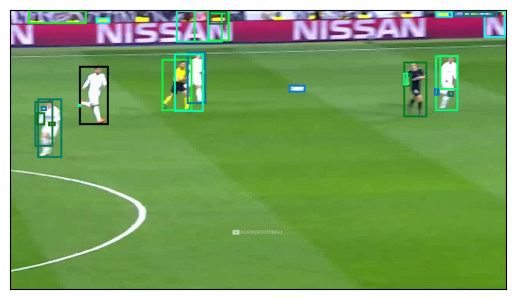

In [54]:
show(test)

In [ ]:
score_threshold = 0.8
imgs_with_boxes = [
    draw_bounding_boxes(
        cat_int, boxes=output["boxes"][output["scores"] > score_threshold], width=4
    )
    for cat_int, output in zip(img, results)
]
show(imgs_with_boxes)

NameError: name 'img' is not defined